<a href="https://colab.research.google.com/github/daniela-estevez/ProyectoIntegrador/blob/main/Avance1_13Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#librerias a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [2]:
# Agrego codigo para leer los archivos desde mi drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Proyecto Integrador

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Proyecto Integrador


In [3]:
data = pd.read_csv("base.csv",sep=",", encoding="latin1")
df= data.copy()

In [4]:
# Checking the shape of the data
print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas.")  # f-string

Hay 380 filas y 116 columnas.


In [5]:
#Mostramos las primeras filas de la base
df.head()

,Nombre,fecha_1er_visita,SEXO,EDAD_1era_visita,fecha_nacimiento,residencia,CONDICION_ACTUAL,num_EPISODIOS_PREVIOS,EDAD_INICIO_1er_EPISODIO,FECHA_INICIO_ACTUAL_EPISODIO,ESTADO_civil,RELIGION,PROVEEDOR_FAMILIAR,OCUPACIoN_JEFE_FAMILIA,OCUPACIoN_PACIENTE,ESCOLARIDAD__JEFE_FAMILIA,ESCOLARIDAD_MAXIMA_PX,AnioS_ESTUDIO_PACIENTE,TABAQUISMO,CIGARROS_DIA,INICIO_TABACO,AniOS_TABAQUSMO,EDAD_SUSPENSION,Frecuencia_Fumar,Consumo_alcohol,tiempo_alcohol,FRECUENCIA_alcohol,CANTIDAD,cafe_te_negro,CAFe_TAZAS_DIA,Consumo_drogas,Tipo_droga,tiempo_droga,ABUSO_SUSTANCIAS_ACTUAL,ABUSO_SUSTANCIAS_ANTERIOR,DEPENDENCIA_SUSTANCIAS_ACTUAL,DEPENDENCIA_SUSTANCIAS_ANTERIOR,MENARCA,RITMO,TENSION_PREMENSTRUAL,INICIO_VIDA_SEXUAL_ACTIVA,GESTA,PARA,CESAREA,ABORTO,EMBARAZO_ACTUAL_SEMANAS,LACTANCIA,POSIBILIDAD_EMBARAZO,METODO_ANTICONCEPTIVO,HISTORIA_PSIQUIATRICA_FAMILIAR,GRADO_FAMILIAR,DX_PRIMARIO,CODIGO_DX.1,CGI-S.1,DX_SECUNDARIO,CODIGO_DX.2,CGI-S.2,DX_TERCIARIO,CODIGO_DX.3,CGI-S.3,MADRS_TOTAL,A1,A2,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A4,A5,EPISODIO_DEPRESIVO_MAYOR_ACTUAL,EPISODIO_DEPRESIVO_MAYOR_PASADO,EPISODIO_DEPRESIVO_MAYOR_RECURRENTE,DURACION_EPISODIO_MAYOR_ACTUAL,EPISODIO_MAYOR_total_vida,TRASTORNO_MAYOR_ACTUAL,TRASTORNO_MAYOR_PASADO,TRASTORNO_MAYOR_RECURRENTE,TRASTORNO_MAYOR_DIAGNOSTICO,SUICIDALIDAD_ACTUAL,SUICIDALIDAD_INTENTO_total_vida,CONDUCTA_SUICIDA_ACTUAL,CONDUCTA_SUICIDA_REMISION_TEMPRANA,B1,B1a,B1b,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B14a,B14b,B14c,B15,B16,B16a,B16b,B16c,B17,B18,B19,B_tot,Puntaje_experto,Riesgo_suicidio,Sintomas_ansiosos
0,1,16/01/2016,F,18.0,23/05/1979,NaN,Primera aparición sin antecedente,NaN,18.0,01/11/1997,Soltero(a),Catolica,Padres,Empleado con calificación manual,Dependiente/Desempleado,Secundaria,Preparatoria,11.0,NaN,NaN,17.0,NaN,17.0,NaN,NaN,NaN,Una vez al mes o menos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Regular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depresion Mayor,1,Trastorno depresivo episodio único,296.2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,12,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,Moderado,Leve
1,2,12/01/1998,F,29.0,30/03/1968,"Guadalupe, Nuevo León",Primera aparición sin antecedente,NaN,27.0,01/11/1996,Casado(a),Catolica,Cónyuge,NaN,Empleado no calificado/Pensionado,Primaria,Preparatoria,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Regular,Leve,20.0,3.0,NaN,3.0,NaN,NaN,NaN,Salpingoclasia,NaN,NaN,NaN,Trastorno depresivo episodio único,296.2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,48,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,Moderado,Moderado-Grave
2,3,05/08/1997,F,58.0,06/02/1938,"Tampico, Tamaulipas",Indistinguible del pasado,NaN,51.0,01/01/1997,Soltero(a),Catolica,Parientes,Gerente/Propietario empresa mediana,Dependiente/Desempleado,Estudios universitarios no terminados,Primaria,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Histerectomía/Menopausia,NaN,25.0,1.0,1.0,NaN,NaN,NaN,NaN,Menopausia,NaN,NaN,NaN,Trastorno depresivo episodio único,296.2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,36,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,Leve,Moderado-Grave
3,4,07/07/1998,M,36.0,15/03/1962,"Monterrey, Nuevo León",Primera aparición sin antecedente,NaN,34.0,01/01/1997,Casado(a),Catolica,Cónyuge,Oficinista/Vendedor/Técnico,Dependiente/Desempleado,Primaria,Preparatoria,11.0,NaN,1.0,20.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,Severa,20.0,3.0,NaN,3.0,NaN,NaN,NaN,Salpingoclasia,NaN,NaN,NaN,Trastorno depresivo episodio único,296.2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,48,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,Leve,Leve
4,5,22/10/1998,F,32.0,26/09/1966,"Guadalupe, Nuevo León",Primera aparición sin antecedente,NaN,31.0,01/01/1998,Casado(a),Catolica,Igualmente compartido,Empleado con calificación man

-> Las columnas de Nombre y residencia no dan información relevante por lo que consideramos pertinente eliminarla en los siguientes pasos.

-> La información de las columnas de fecha_nacimiento y fecha_1er_visita  esta contenida en edad_1er_visita por lo que consideramos pertinente eliminarla en los siguientes pasos.

-> La información de la columna de FECHA_INICIO_ACTUAL_EPISODIO esta contenida en EDAD_INICIO_1er_EPISODIO por lo que consideramos pertinente eliminarla en los siguientes pasos.

In [6]:
#df = df.drop(columns=["Nombre","fecha_nacimiento","residencia","fecha_1er_visita","FECHA_INICIO_ACTUAL_EPISODIO"])

### ANALISIS DE VALORES FALTANTES

In [7]:
#Mostramos columnas vacias
df.loc[:, df.isnull().all()].columns

Index(['TABAQUISMO', 'Frecuencia_Fumar', 'Consumo_alcohol', 'tiempo_alcohol',
       'cafe_te_negro', 'Consumo_drogas', 'Tipo_droga', 'tiempo_droga'],
      dtype='object')

Observamos que hay varias columnas completamente vacías por lo que consideramos que deben eliminarse de la base.

In [8]:
#df = df.drop(columns=["TABAQUISMO","Frecuencia_Fumar","Consumo_alcohol","tiempo_alcohol","cafe_te_negro","Consumo_drogas","Tipo_droga","tiempo_droga"])

In [9]:
# Calcular el porcentaje de valores nulos en cada columna
null_percentage = (df.isnull().sum() / len(df)) * 100

# Crear un DataFrame con los porcentajes de valores nulos
null_df = pd.DataFrame({'Columna': null_percentage.index, 'Porcentaje_Null': null_percentage.values})

# Ordenar el DataFrame por el porcentaje de valores nulos de manera descendente
null_df = null_df.sort_values(by='Porcentaje_Null', ascending=False)

# Imprimir el DataFrame ordenado
print(null_df[null_df['Porcentaje_Null'] < 100])

                                 Columna  Porcentaje_Null
46                             LACTANCIA        99.736842
45               EMBARAZO_ACTUAL_SEMANAS        99.736842
36       DEPENDENCIA_SUSTANCIAS_ANTERIOR        99.473684
58                           CODIGO_DX.3        99.210526
35         DEPENDENCIA_SUSTANCIAS_ACTUAL        99.210526
34             ABUSO_SUSTANCIAS_ANTERIOR        99.210526
57                          DX_TERCIARIO        99.210526
59                               CGI-S.3        99.210526
33               ABUSO_SUSTANCIAS_ACTUAL        98.947368
56                               CGI-S.2        94.736842
22                       EDAD_SUSPENSION        91.842105
55                           CODIGO_DX.2        91.052632
54                         DX_SECUNDARIO        90.789474
27                              CANTIDAD        86.052632
39                  TENSION_PREMENSTRUAL        85.000000
43                               CESAREA        80.000000
19            

-> Notamos un gran número de columnas con valores nulos.

In [10]:
len(null_df[null_df['Porcentaje_Null'] > 50].Columna.values)

35

-> Hay 35 columnas con un 50% de valores nulos. Consideramos que no son muy relevantes para el estudio por lo que pensamos deben eliminarse.

In [11]:
len(null_df[(null_df['Porcentaje_Null'] > 0) & (null_df['Porcentaje_Null'] < 50)].Columna.values)

23

-> Hay 23 columnas con valores nulos que tienen un porcentaje de nulos menor al 50%. Probablemente algunas necesiten un tratamiento especial.

In [12]:
#df = df.drop(columns=['LACTANCIA','EMBARAZO_ACTUAL_SEMANAS','DEPENDENCIA_SUSTANCIAS_ANTERIOR','CGI-S.2','CODIGO_DX.2',
#                       'DX_TERCIARIO','DEPENDENCIA_SUSTANCIAS_ACTUAL','ABUSO_SUSTANCIAS_ANTERIOR','ABUSO_SUSTANCIAS_ACTUAL','CGI-S.1',
#                       'EDAD_SUSPENSION','CODIGO_DX.1','DX_SECUNDARIO','CANTIDAD','TENSION_PREMENSTRUAL','CESAREA','ABORTO','CIGARROS_DIA',
#                       'AniOS_TABAQUSMO','FRECUENCIA_alcohol','INICIO_TABACO','POSIBILIDAD_EMBARAZO','CAFe_TAZAS_DIA','PARA',
#                       'METODO_ANTICONCEPTIVO','GRADO_FAMILIAR','HISTORIA_PSIQUIATRICA_FAMILIAR'])

### ANALISIS DE TIPO DE VARIABLES

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 116 entries, Nombre to Sintomas_ansiosos
dtypes: float64(29), int64(53), object(34)
memory usage: 344.5+ KB


-> De las 116 variables 29 son de tipo float, 53 de tipo entero y 34 de tipo objeto.

In [14]:
df.dtypes

Nombre                                   int64
fecha_1er_visita                        object
SEXO                                    object
EDAD_1era_visita                       float64
fecha_nacimiento                        object
residencia                              object
CONDICION_ACTUAL                        object
num_EPISODIOS_PREVIOS                  float64
EDAD_INICIO_1er_EPISODIO               float64
FECHA_INICIO_ACTUAL_EPISODIO            object
ESTADO_civil                            object
RELIGION                                object
PROVEEDOR_FAMILIAR                      object
OCUPACIoN_JEFE_FAMILIA                  object
OCUPACIoN_PACIENTE                      object
ESCOLARIDAD__JEFE_FAMILIA               object
ESCOLARIDAD_MAXIMA_PX                   object
AnioS_ESTUDIO_PACIENTE                 float64
TABAQUISMO                             float64
CIGARROS_DIA                           float64
INICIO_TABACO                          float64
AniOS_TABAQUS

-> Notamos que hay varias columnas con categorias erroneas. En un siguiente paso deberemos corregirlo.

ANALISIS DE ESTADÍSTICAS BÁSICAS PARA VARIABLES NUMÉRICAS

In [15]:
#Mostramos las estadísticas principales de variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nombre,380.0,190.500000,109.840794,1.00,95.75,190.50,285.25,380.0
EDAD_1era_visita,378.0,51.261905,17.269365,18.00,37.25,51.00,65.00,91.0
num_EPISODIOS_PREVIOS,195.0,2.025641,1.510908,1.00,1.00,1.00,2.50,9.0
EDAD_INICIO_1er_EPISODIO,371.0,48.797844,101.009096,8.00,27.00,42.00,61.00,1955.0
AnioS_ESTUDIO_PACIENTE,359.0,10.643454,4.683372,0.00,6.00,11.00,15.00,21.0
TABAQUISMO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIGARROS_DIA,79.0,12.151899,12.205598,1.00,2.00,8.00,20.00,60.0
INICIO_TABACO,85.0,22.800000,8.525592,12.00,17.00,20.00,25.00,53.0
AniOS_TABAQUSMO,84.0,20.047619,15.190283,1.00,7.75,19.50,26.50,60.0
EDAD_SUSPENSION,31.0,40.096774,14.036512,12.00,29.00,44.00,49.50,72.0


Observamos también que tenemos variables que al tener el mismo valor en todos los resgitros no aportan información, así que consideramos eliminarlas.

Las variables a las que hacemos referencia son:
A4, CONDUCTA_SUICIDA_REMISION_TEMPRANA, B4, B6, B7, B9, B11, B12, B13, B14, B14a, B14b, B14c, B15, B16, B16a, B16b, B16c, B17, B19, B_tot

In [16]:
#df = df.drop(columns=["A4","CONDUCTA_SUICIDA_REMISION_TEMPRANA","B4","B6","B7","B9","B11","B12","B13","B14","B14a","B14b","B14c","B15","B16","B16a","B16b","B16c","B17","B19","B_tot"])
#df.describe()

### ANALISIS DE ESTADÍSTICAS BÁSICAS PARA VARIABLES TIPO OBJETO

In [17]:
#Mostramos las estadísticas principales de variables numéricas
df.select_dtypes(include=['object']).describe(include="all").T

,count,unique,top,freq
fecha_1er_visita,377,314,20/05/1997,3
SEXO,380,2,F,243
fecha_nacimiento,374,304,22/02/2000,6
residencia,372,30,"Monterrey, Nuevo León",136
CONDICION_ACTUAL,356,5,Recurrencia condición previa,177
FECHA_INICIO_ACTUAL_EPISODIO,367,216,15/06/1905,12
ESTADO_civil,370,6,Casado(a),202
RELIGION,344,14,Catolica,311
PROVEEDOR_FAMILIAR,354,9,Paciente,145
OCUPACIoN_JEFE_FAMILIA,330,9,Empleado no calificado/Pensionado,77


-> La variable SEXO muestra que el 63% de las observaciones son mujer.

->La variable Riesgo_suicidio muestra que el 55% de las observaciones pertenecen a la clase Leve por lo que las clases estan balanceadas.

->La variable Sintomas_ansiosos muestra que el 64% de las observaciones pertenecen a la clase Moderado-Grave por lo que las clases estan balanceadas.

In [18]:
#Obtenemos los nombres de las variables categoricas
categoricas = df.select_dtypes(include=['object']).columns

#visualizamos la frecuencia de los distintos valores para cada una de las columnas identificadas
for columna in categoricas:
    frec_rel = df[columna].value_counts(normalize=True)*100
    print(f"Frecuencia relativa de valores en la columna {columna}:")
    print(frec_rel)
    print()

Frecuencia relativa de valores en la columna fecha_1er_visita:
fecha_1er_visita
20/05/1997    0.795756
14/08/1996    0.795756
04/08/2008    0.795756
31/05/2000    0.795756
03/09/2007    0.795756
                ...   
31/08/2010    0.265252
05/05/2005    0.265252
28/07/1998    0.265252
13/09/2010    0.265252
20/10/1998    0.265252
Name: proportion, Length: 314, dtype: float64

Frecuencia relativa de valores en la columna SEXO:
SEXO
F    63.947368
M    36.052632
Name: proportion, dtype: float64

Frecuencia relativa de valores en la columna fecha_nacimiento:
fecha_nacimiento
22/02/2000    1.604278
12/02/2000    1.069519
21/02/2000    1.069519
16/02/2000    1.069519
10/03/2000    0.802139
                ...   
14/10/1957    0.267380
10/01/1948    0.267380
25/01/1981    0.267380
23/05/1957    0.267380
02/05/1941    0.267380
Name: proportion, Length: 304, dtype: float64

Frecuencia relativa de valores en la columna residencia:
residencia
Monterrey, Nuevo León                   36.559140
Mo

### ANALISIS DE CORRELACIÓN

No vamos a considerar a las variables que tienen puras observaciones vacias ni variable Nombre.

In [19]:
numericas = df.drop(columns=['Nombre','TABAQUISMO', 'Frecuencia_Fumar', 'Consumo_alcohol', 'tiempo_alcohol','cafe_te_negro',
                             'Consumo_drogas', 'Tipo_droga', 'tiempo_droga']).select_dtypes(include=['float','int64'])

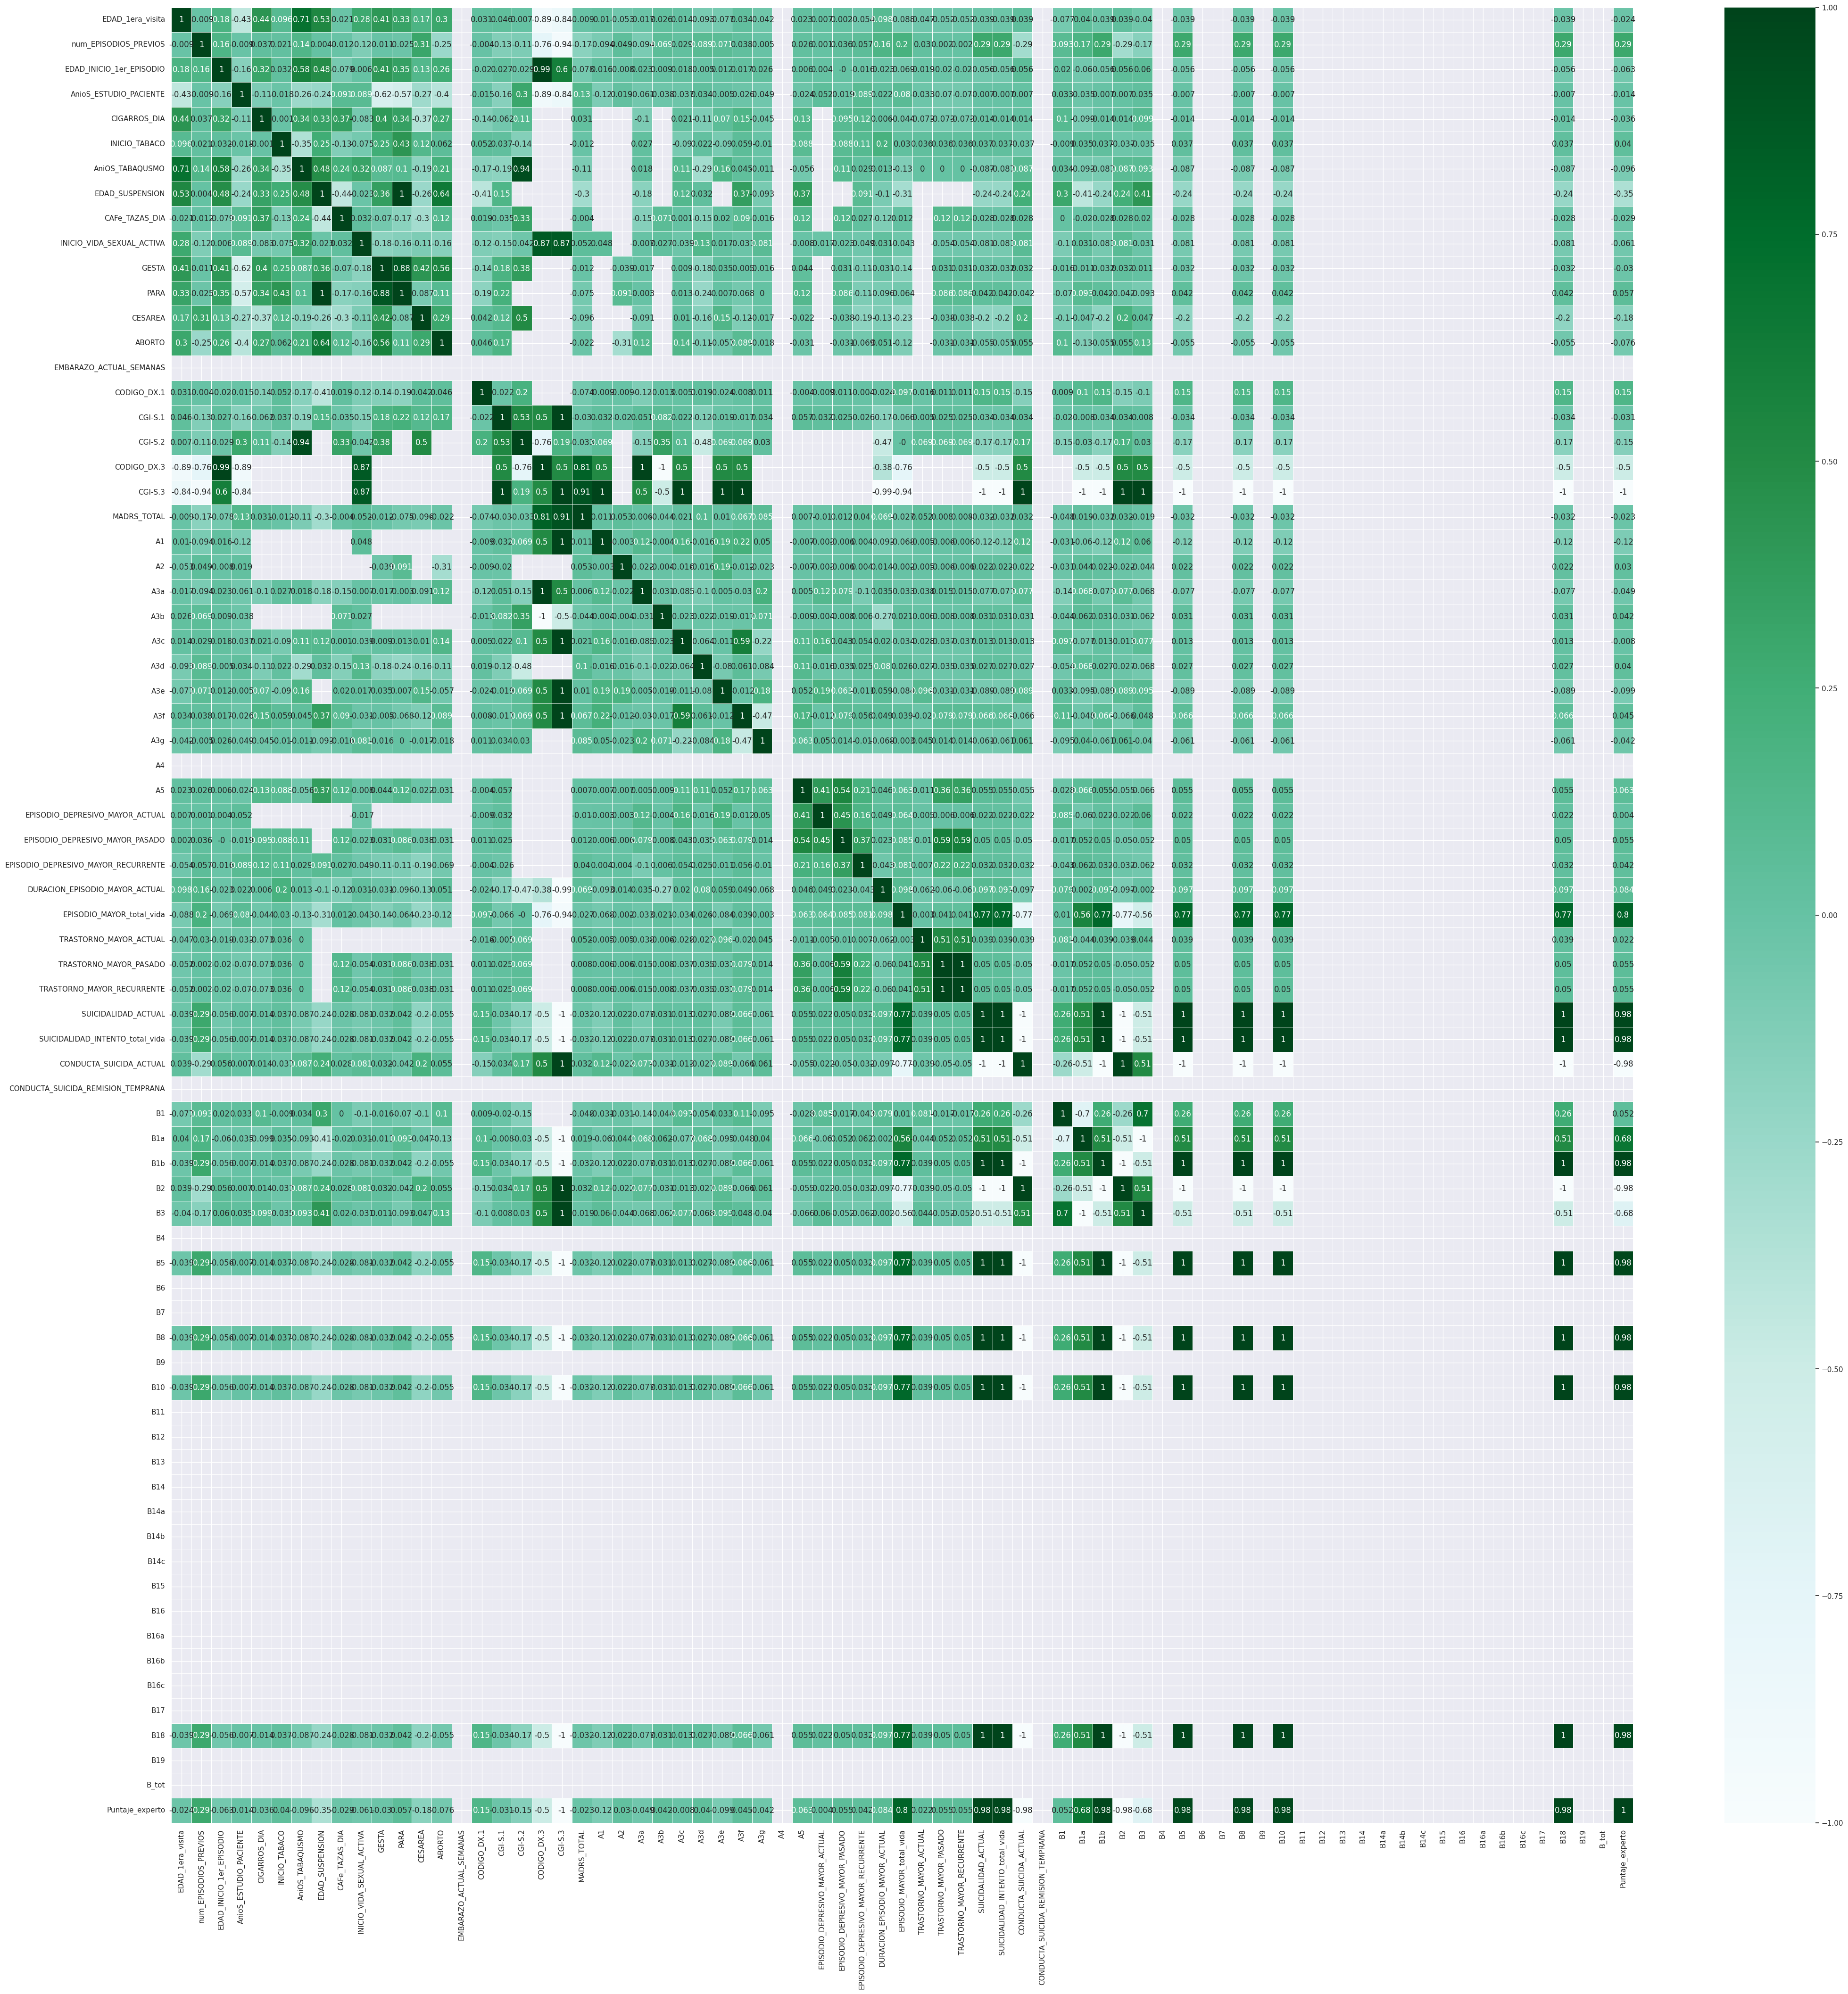

In [20]:
sns.set(rc={'figure.figsize':(50,50)})

sns.heatmap(round(numericas.corr(),3), annot = True, cmap= 'BuGn', linewidths= 0.5)

plt.show()

Como es dificil de leer el heatmap de correlaciones anterior vamos a filtrar las correlaciones más altas.

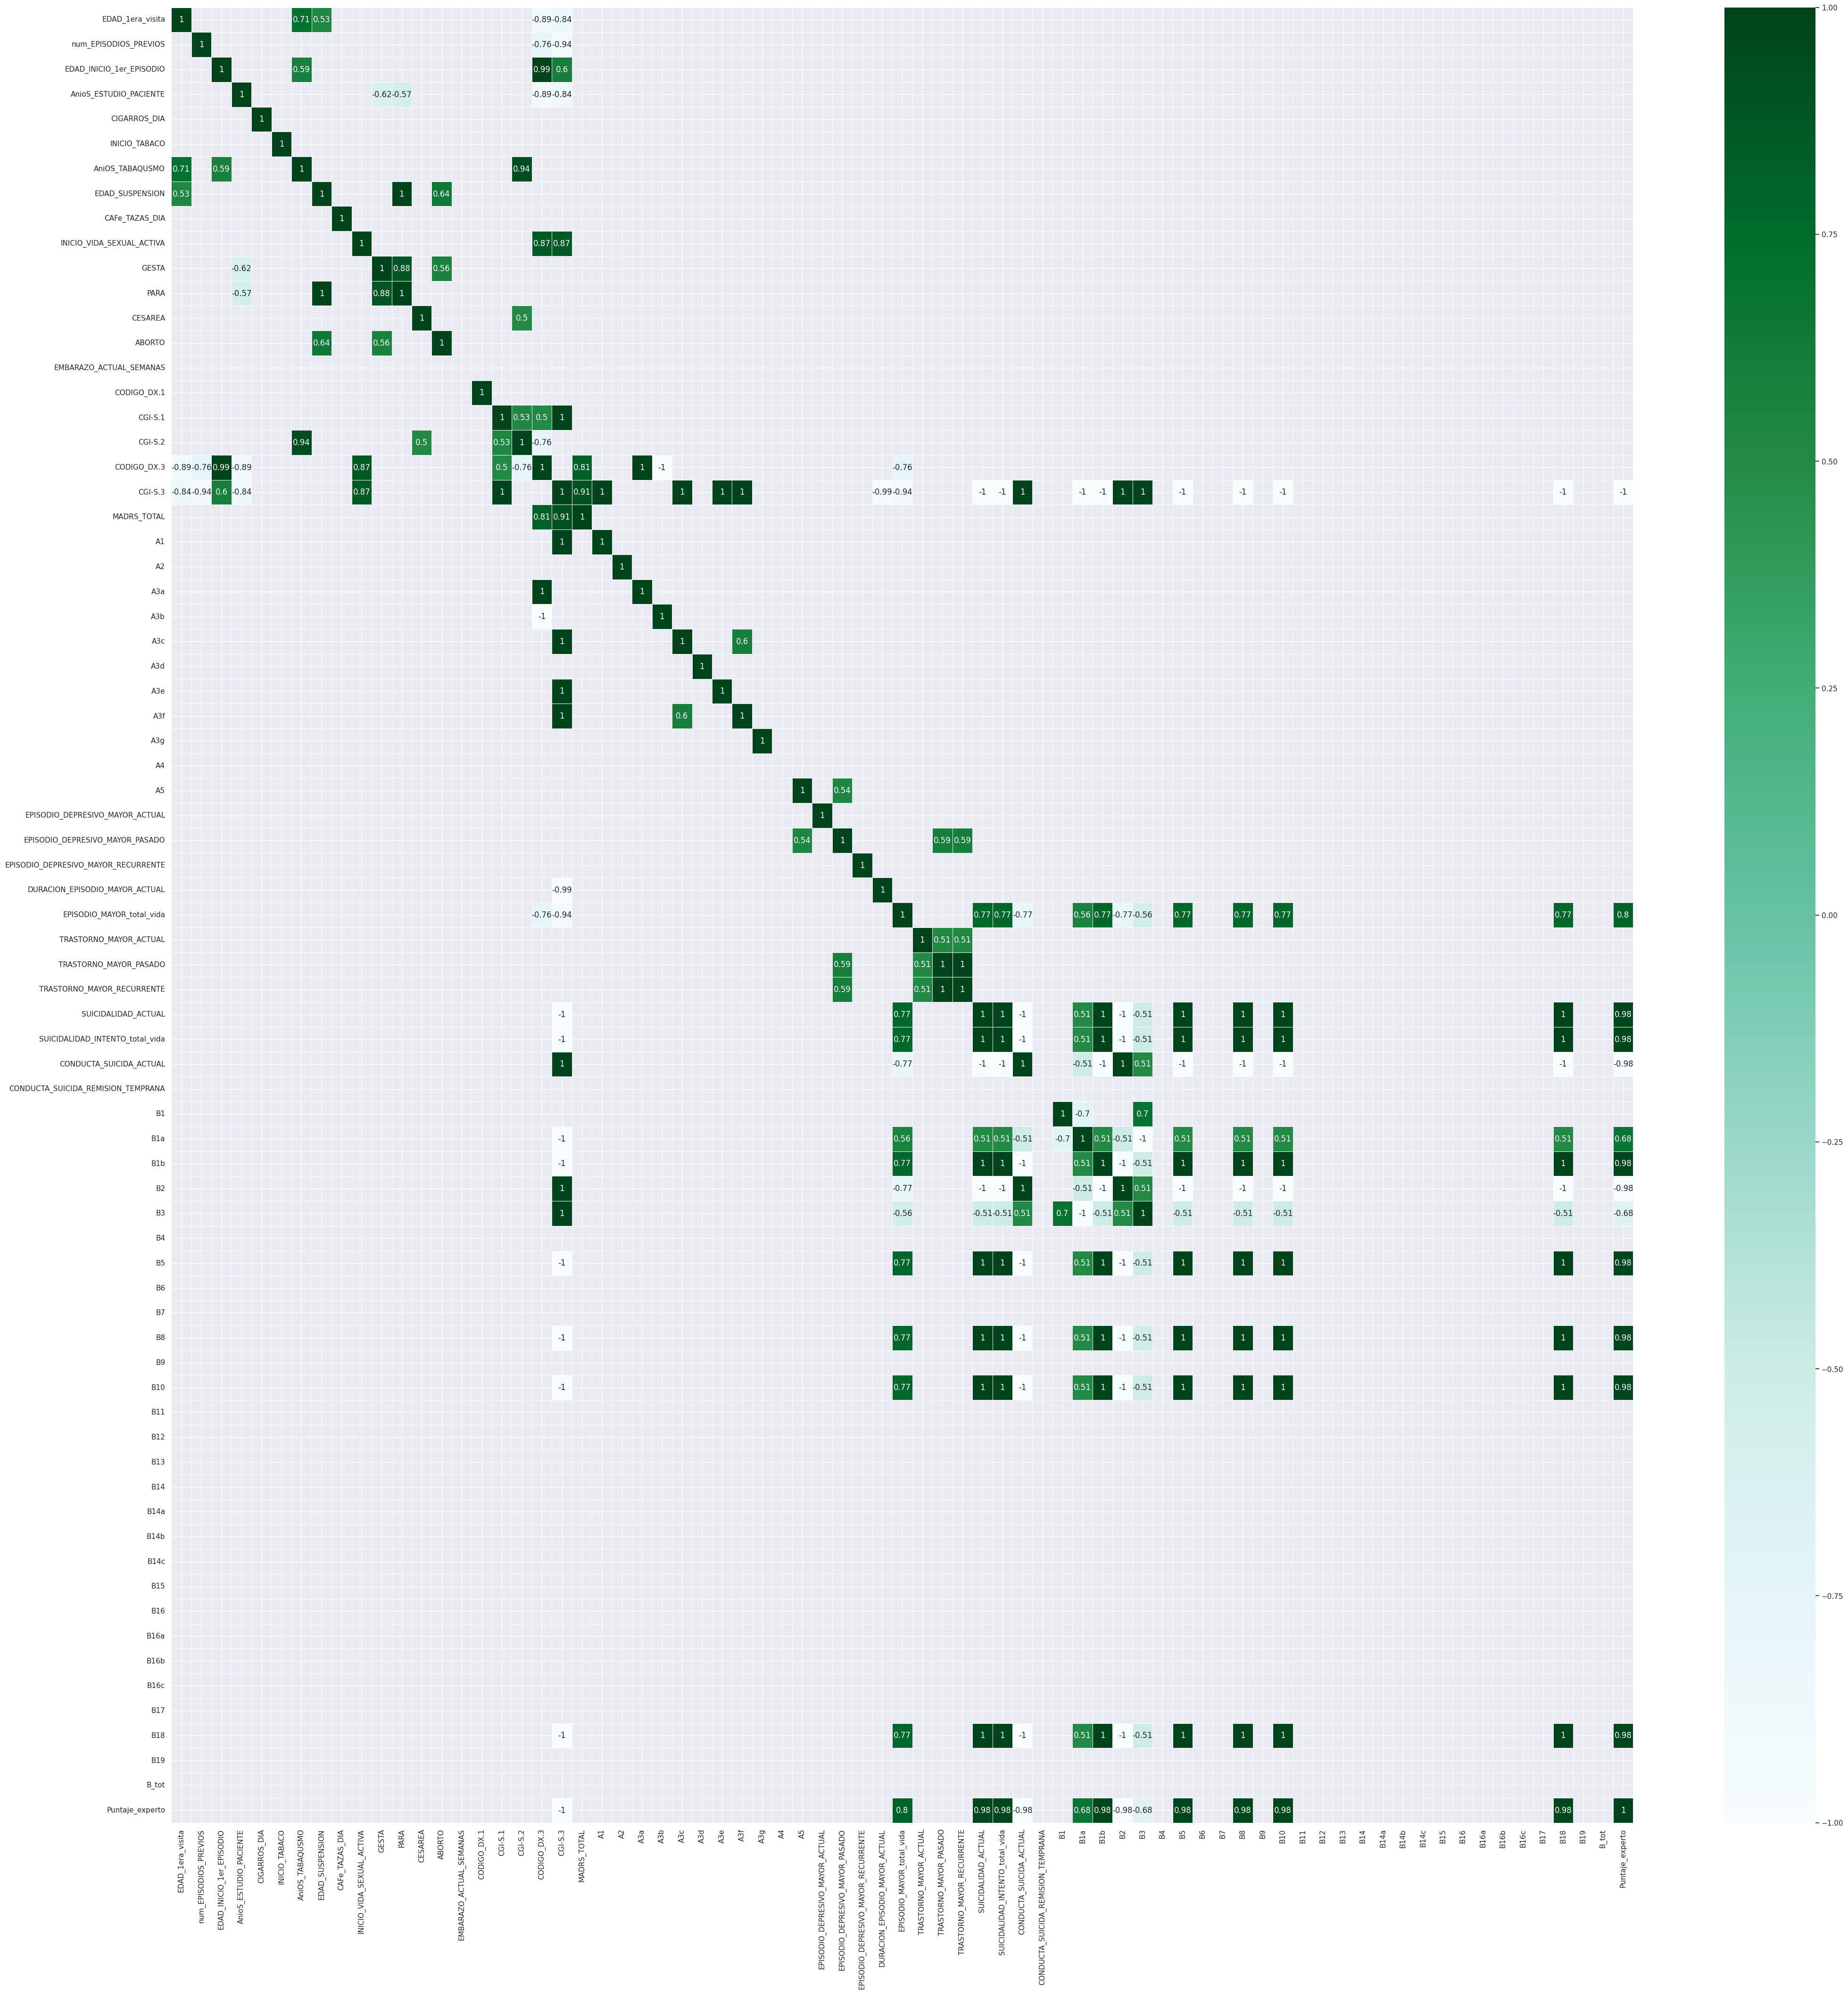

In [21]:
# Calcula la matriz de correlación
corr_matrix = numericas.corr()

# Define el umbral de correlación
umbral = 0.5  # Puedes ajustar este valor según tus necesidades

# Filtra las correlaciones que superen el umbral
correlaciones_filtradas = corr_matrix[abs(corr_matrix) > umbral]

# Genera el heatmap de las correlaciones filtradas
sns.heatmap(correlaciones_filtradas, annot=True, cmap='BuGn', linewidths=0.5);